## LinearRegression with Multivariant

In [3]:
# import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
# read the dataset from csv file and create a dataframe
df = pd.read_csv('hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


* Observation:
  * Dataset "expirence" column is having words as value - Action: need to conver it into numbers
  * Dataset "expirence" column is having missing values int he first 2 rows -Action : assign to be zero
  * Dataset "test_score(out of 10)" column is missing value. Action: fill it with mean value

### Convert the values from word to numbers

In [5]:
# import w2n lib
from word2number import w2n

In [6]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [7]:
df.experience= df.experience.fillna('zero')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


#### converting word to number

In [8]:
df.experience = df.experience.apply(w2n.word_to_num)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


#### Assign missing values to the second column

In [9]:
import math

In [10]:
median_testscore = math.floor(df['test_score(out of 10)'].mean())
median_testscore 

7

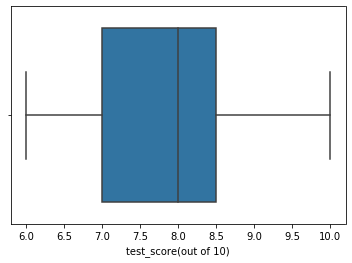

In [11]:
sns.boxplot(df['test_score(out of 10)'])

In [12]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(median_testscore)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


### Build Linear Regression Model

In [13]:
# import Linear Regression class
from sklearn.linear_model import LinearRegression

In [14]:
reg = LinearRegression()

In [15]:
reg.fit(df.drop('salary($)',axis=1),df['salary($)'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
reg.predict([[2,9,6]])

array([53713.86677124])

In [17]:
reg.predict([[12,10,10]])

array([93747.79628651])

In [18]:
reg.coef_

array([2922.26901502, 2221.30909959, 2147.48256637])

In [19]:
reg.intercept_

14992.65144669314

In [20]:
2*2812.95487627+9*1845.70596798+6*2205.24017467+17737.26346433771

53205.967976717715

## Save the Mode using Pickle 

In [21]:
import pickle

In [24]:
with open('model_pick','wb') as file:
    pickle.dump(reg,file)

#### Load Saved file

In [26]:
with open('model_pick','rb') as file:
    mp = pickle.load(file)

In [27]:
mp.predict([[2,9,6]])

array([53713.86677124])

## Save Trained Model using joblib

In [33]:
import joblib

In [37]:
joblib.dump(reg,'model_joblib')

['model_joblib']

#### Load the Saved Model

In [38]:
mj = joblib.load('model_joblib')

In [39]:
mj.predict([[2,9,6]])

array([53713.86677124])